In [203]:
import numpy as np 
import pandas as  pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap


In [204]:
#Reading the csv data
df = pd.read_csv('world-happiness-report-2019.csv')
print(df)

             Country (region)  Ladder  SD of Ladder  Positive affect  \
0                     Finland       1             4             41.0   
1                     Denmark       2            13             24.0   
2                      Norway       3             8             16.0   
3                     Iceland       4             9              3.0   
4                 Netherlands       5             1             12.0   
..                        ...     ...           ...              ...   
151                    Rwanda     152            63             54.0   
152                  Tanzania     153           122             78.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   
155               South Sudan     156           140            127.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
0               10.0             2.0      5.0         4.0     

In [205]:
#cleaning data by dropping missing values
df.dropna(inplace = True)


In [206]:
df.describe()


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,79.157143,78.450000,78.242857,79.157143,77.500000,78.828571,75.700000,78.850000,79.014286,75.478571
std,45.700664,46.121255,44.331627,44.506126,45.815787,45.108972,42.656011,44.727782,43.356310,43.979961
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.750000,39.750000,40.750000,40.750000,36.750000,39.750000,39.750000,40.750000,41.750000,36.750000
50%,79.500000,77.500000,78.500000,78.500000,77.500000,79.500000,76.500000,79.500000,78.500000,77.500000
75%,119.250000,119.250000,116.250000,117.250000,118.250000,118.250000,112.250000,116.250000,117.250000,113.250000
max,156.000000,156.000000,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [207]:
#Finding the kurtosis and skewness of the data
kur = df.select_dtypes([int,"float"]).kurt()
print('kurtosis\n',kur) 
skew = df.select_dtypes([int,"float"]).skew()
print('skewness\n',skew) 

kurtosis
 Ladder                     -1.203630
SD of Ladder               -1.256111
Positive affect            -1.168009
Negative affect            -1.221168
Social support             -1.296182
Freedom                    -1.227693
Corruption                 -1.177174
Generosity                 -1.162258
Log of GDP\nper capita     -1.221828
Healthy life\nexpectancy   -1.231452
dtype: float64
skewness
 Ladder                     -0.035484
SD of Ladder                0.025785
Positive affect            -0.016326
Negative affect            -0.021048
Social support              0.002716
Freedom                    -0.029844
Corruption                 -0.060349
Generosity                 -0.052728
Log of GDP\nper capita     -0.007118
Healthy life\nexpectancy   -0.026966
dtype: float64


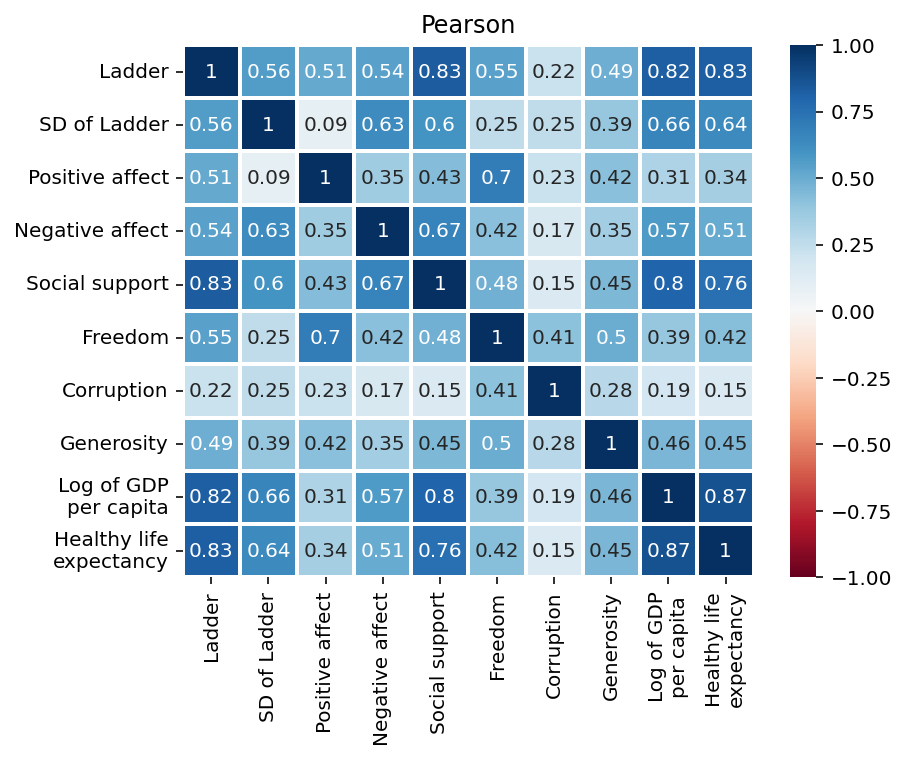

In [208]:
def heatmap ():
    """
    Creating heating map showing Correlation between variable
    """
    plt.figure(dpi = 144)
    sns.heatmap(df.select_dtypes([int,"float"]).corr(), annot = True, cmap ='RdBu', vmin = -1, vmax = 1,linewidths = 2)
    plt.title('Pearson')
    plt.show()
    
heatmap()

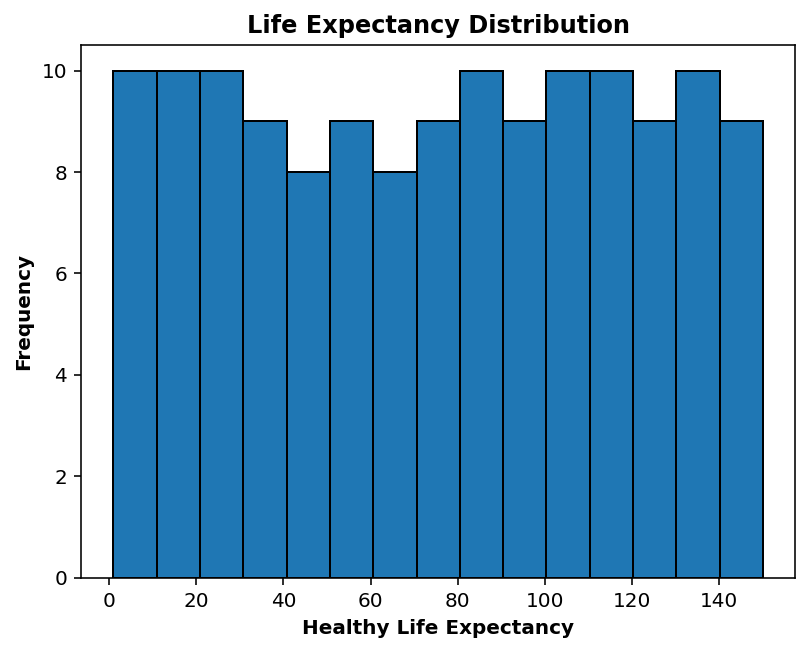

In [209]:
def Distribution_of_life_expectancy ():
    """
    Plots an Histogram showing the distribution of Healthy Life expectancy
    
    Parameter:
    Healthy Life expectancy Column from DataFrame
    
    Returns the histogram PLot
    """
    plt.figure(dpi = 144)
    
    plt.hist(x, bins=15, edgecolor='black')
    plt.xlabel('Healthy Life Expectancy' , fontweight = 'bold')
    plt.ylabel('Frequency' , fontweight = 'bold')
    plt.title('Life Expectancy Distribution' , fontweight = 'bold')
    plt.show()
    

#Retrieving the Healthy life expectancy from the Data set    
x = df['Healthy life\nexpectancy']

Distribution_of_life_expectancy()

In [210]:
def linefunc(x,a,b):
    """ 
Function for fitting a straight line, for curve_fit
x: independent variable
a, b: parameters to be fitted
"""
    y = a*x + b
    return (y)


In [222]:
def Relation_btw__gdp_and_healthylife_and_fitted_line():
    """
    Plots an scatter plot showing relation between Healthy life expectancy and Log of GDP per capita 
    with fitted curve and error bar
    
    """
    x = df['Healthy life\nexpectancy']
    y = df['Log of GDP\nper capita']
    
    #array of values for healthy life expectancy to predict GDP
    future_x = np.array([165,170,180])
    
    #predicts GDP values  values for the specified future healthy life expectancy.
    future_pred = linefunc(future_x, p[0], p[1])
    
    #extracts the upper And lower bound of the error
    upper_err = sigma[0]
    lower_err = sigma[1]  
    
    #combines the upper and lower error bounds into a single array named err
    err = np.vstack((upper_err, lower_err))
    
    
    plt.figure(dpi = 144)
    plt.scatter(x, y, alpha = 1, label = 'Data')
    
    #creates an array of 100 evenly spaced numbers over the range from the minimum value of x to maximum value of x
    xfit = np.linspace(np.min(x), np.max(future_x), 100)
    
    #calculates the y-values of the fitted line for each x-value in
    plt.plot(xfit,linefunc(xfit, p[0], p[1]), 'k-', label='Fitted Line')
    
    #lower and upper bounds of the confidence interval
    plt.fill_between(xfit,linefunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linefunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.1, label='Uncertainty Band')
    
    #plots error bar
    plt.errorbar(x, y, xerr=err, yerr=err, fmt='o', capsize=5, label='Error Bars')
    
    #Plots future predicted points
    plt.scatter(future_x, future_pred, color ='red', marker='o', label='Predicted Points')

    
    #sets the label for the x-axis.
    plt.xlabel('Healthy life\nexpectancy' , fontweight = 'bold')
    #sets the label for the y-axis.
    plt.ylabel('Log of GDP\nper capita' , fontweight = 'bold')
    
    plt.title('Relation' , fontweight = 'bold')
    plt.legend()
    plt.show()

    


a = 0.86 +/- 0.04
b = 14.01 +/- 3.56


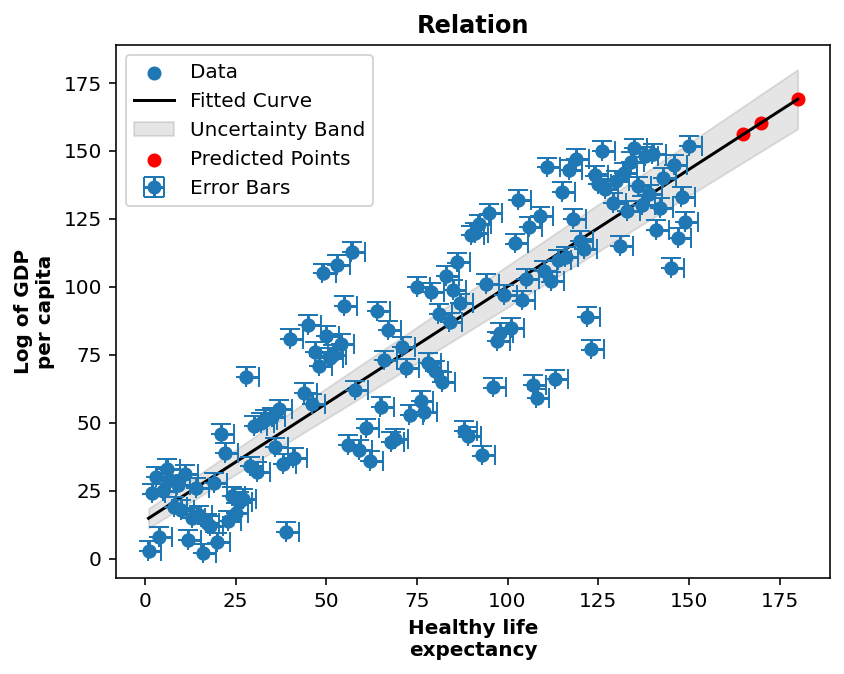

In [221]:
#Feature and target variable
x = df['Healthy life\nexpectancy']
y = df['Log of GDP\nper capita']

#finds the optimal parameters
p, cov = curve_fit(linefunc, x, y)  

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

#Printing the optimal parameter and error
print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

Relation_btw__gdp_and_healthylife_and_fitted_line( )

In [213]:
#Scaling the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df[['Healthy life\nexpectancy', 'Social support']])


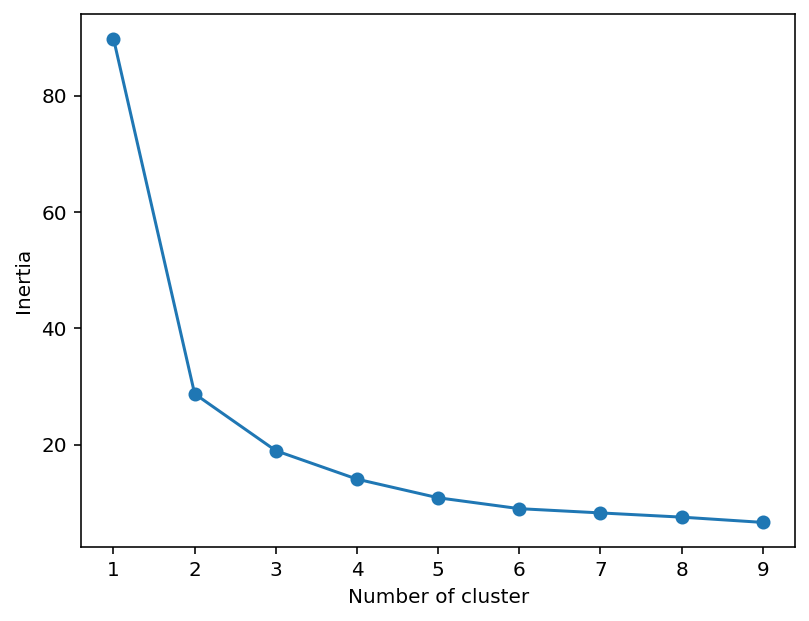

In [214]:
def optimize_k_means(data, max_k):
    """
    Calculates WCSS for n cluster using elbow method
    """
    means = []
    inertias = []
    for k in range(1, max_k):
        #Creates a KMeans clustering model with k
        kmeans = KMeans(n_clusters = k)
        
        #fits the KMeans model to the data.
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Plotting the elbow plot
    plt.figure(dpi = 144)
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of cluster")
    plt.ylabel("Inertia")
    plt.show()
    
optimize_k_means(df_scaled,10)

In [230]:
def plot_kmeans_clusters(labels, centers,df_inverse):
    """
    Plots the Kmeans Cluster
    """
    
    
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    plt.figure(dpi = 144)
    #Creates a scatter plot of data
    
    plt.scatter(df_inverse[:,0], df_inverse[:,1], c=labels, cmap = cmap, label='Data')
    #Plot cluster centers on the scatter plot
    plt.scatter(centers[:,0],centers[:,1], s = 200, c='red', marker='x', label = 'Estimated Centers')
    
    plt.scatter(predicted_data[:, 0], predicted_data[:, 1], c=predicted_labels, cmap=cmap, marker='o', edgecolors='black', label='Predicted Points')
    plt.xlabel('Healthy life expectancy')
    plt.ylabel('Social support')
    plt.legend()
    plt.title('KMeans Cluster')
    plt.show()
    

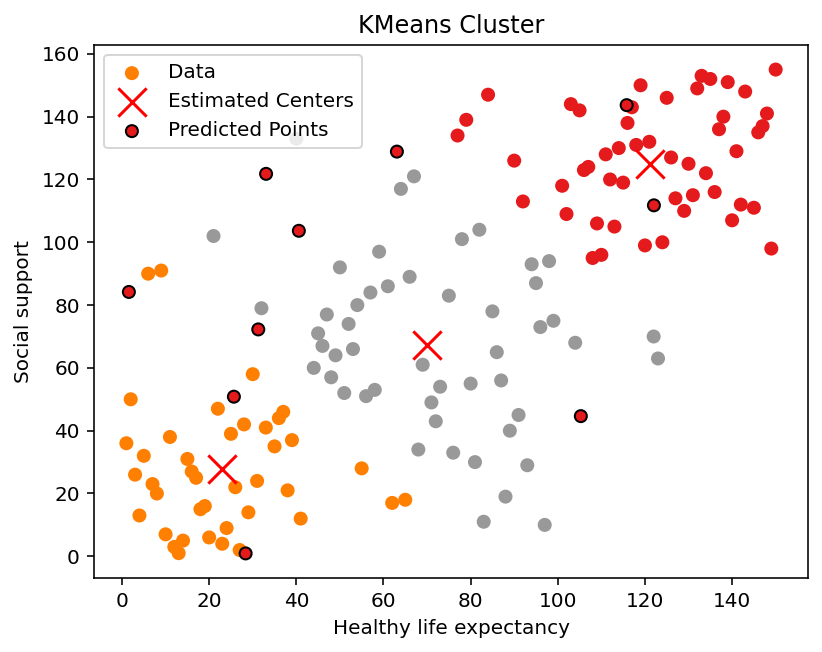

In [233]:
#creates KMeans with 3 clusters
kmeans = KMeans (n_clusters=3)

#Fits the kmean model to scaled data
kmeans.fit(df_scaled)

#creates a new column ‘kmeans_3’ and stores the cluster labels there.
df['kmeans_3'] = kmeans.labels_

#Converts back to original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_inverse = scaler.inverse_transform(df_scaled)

#number of clusters to be used in KMeans clustering.
optimal_k = 3
    
#creates KMeans with 3 clusters 
kmeans = KMeans(n_clusters=optimal_k, n_init=20)

#fits the KMeans model to the scaled data
kmeans.fit(df_scaled)
labels = kmeans.labels_

#Sets random seed
np.random.seed(22)
#Generates random data for predicting
predicted_data = np.random.rand(10,2) *150
#Assign cluster label to the data
predicted_labels = kmeans.predict(predicted_data)


plot_kmeans_clusters(labels, centers,df_inverse)